# Lesson 2 - ANOVA and Regression


<br>

## <a id="toc">Table of Contents</a>
>- [Practice 1 : Using PROC GLM to Perform a One-Way ANOVA](#P1)
>- [Practice 3 : Describing the Relationship between Continuous Variables](#P3)

### <a id="P1">Practice 1 : Using PROC GLM to Perform a One-Way ANOVA</a>
Montana Gourmet Garlic is a company that uses organic methods to grow garlic. It specializes in hardneck varieties. Knowing a little about experimental methods, the owners design an experiment to test whether growth of the garlic is affected by the type of fertilizer. They limit the experimentation to a Rocambole variety named Spanish Roja, and test three organic fertilizers and one chemical fertilizer (as a control). They "blind" themselves to the fertilizer by using containers with numbers 1 through 4. (In other words, they design the experiment in such a way that they do not know which fertilizer is in which container.) One acre of farmland is set aside for the experiment. The land is divided into 32 beds, and they randomly assign fertilizers to the beds. At harvest, they calculate the average weight of garlic bulbs in each of the beds. The data are in the stat1.garlic data set.

Consider an experiment to study four types of fertilizer, labeled 1, 2, 3, and 4. One fertilizer is chemical and the rest are organic. You want to see whether the average weights of the garlic bulbs are significantly different for plants in beds that use different fertilizers.

1. Test the hypothesis that the means are equal. Use PROC MEANS to generate descriptive statistics for the four groups, and use PROC SGPLOT to produce box plots of bulb weight for the four groups. Submit the code and view the results.

2. Perform a one-way ANOVA using PROC GLM. Be sure to check that the assumptions of the analysis method that you choose are met. Submit the code and view the results.

3. What conclusions can you reach at this point in your analysis?

In [1]:
libname STAT1 "S:/courses/st142";

SAS Connection established. Subprocess id is 1868


9                                                          The SAS System                             10:08 Tuesday, August 31, 2021

44         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
44       ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
45         
46         libname STAT1 "S:/courses/st142";
NOTE: Libref STAT1 was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: S:\courses\st142
47         
48         
49         ods html5 (id=saspy_internal) close;ods listing;
50         

10                                                         The SAS System                             10:08 Tuesday, August 31, 2021

51         


In [4]:
proc print data=stat1.garlic (obs=15) noobs;
run;

BedID,Fertilizer,BulbWt
101,1,0.23916
102,1,0.25828
103,1,0.20479
104,1,0.24337
105,1,0.27264
106,1,0.21145
107,1,0.20589
108,1,0.24763
201,2,0.17584
202,2,0.22799


In [5]:
proc freq data=stat1.garlic;
 tables Fertilizer;
run;

Fertilizer,Frequency,Percent,CumulativeFrequency,CumulativePercent
1,8,25.00,8,25.00
2,8,25.00,16,50.00
3,8,25.00,24,75.00
4,8,25.00,32,100.00


In [6]:
proc means data=stat1.garlic;
    var Bulbwt;
    class fertilizer;
run;


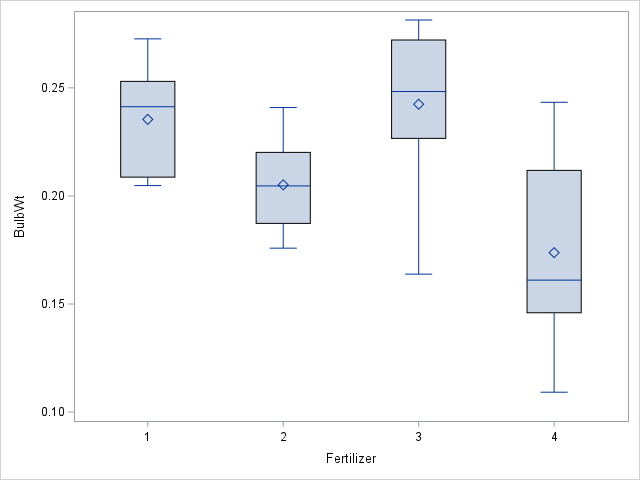

In [15]:
proc sgplot data=stat1.garlic;
    vbox bulbwt / category=fertilizer;
run;


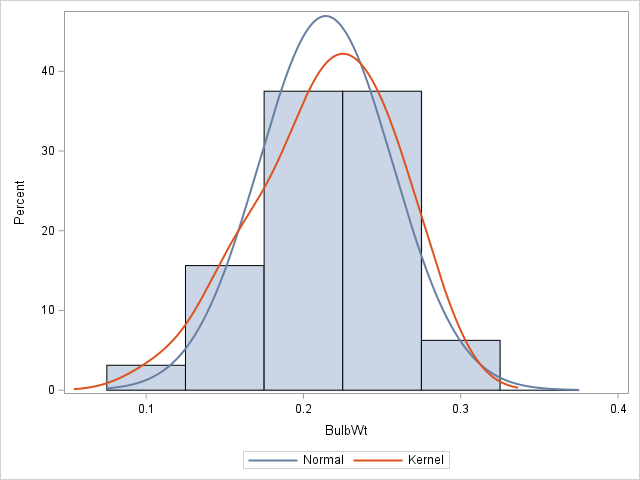

In [13]:
proc sgplot data=stat1.garlic;
    histogram Bulbwt / nbins=6;
    density Bulbwt;
    density Bulbwt / type=kernel;
run;


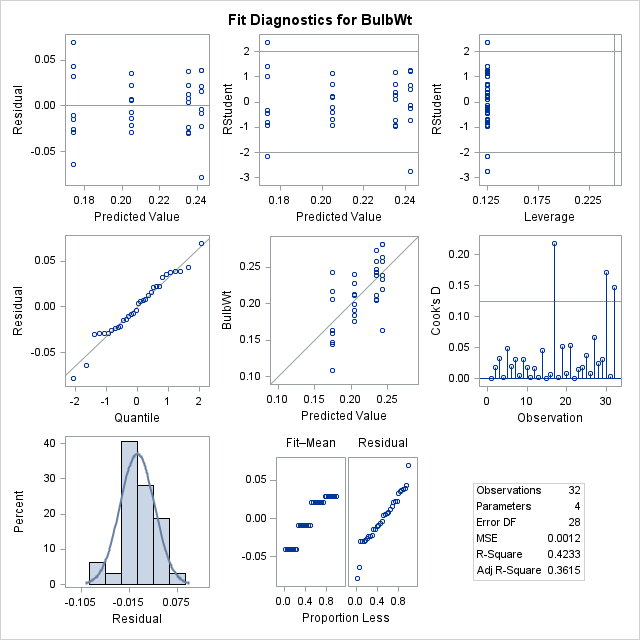
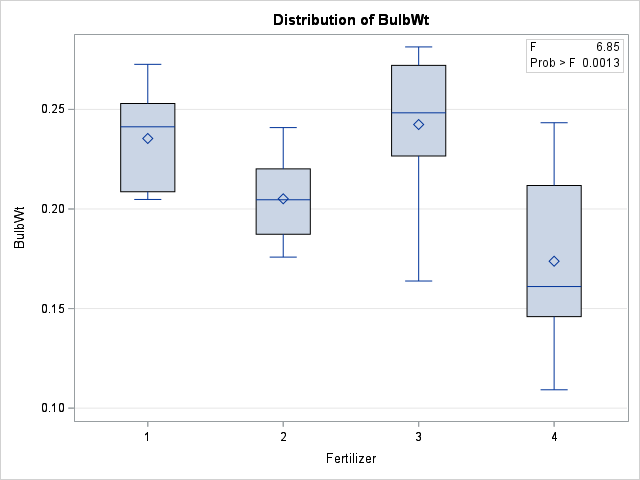
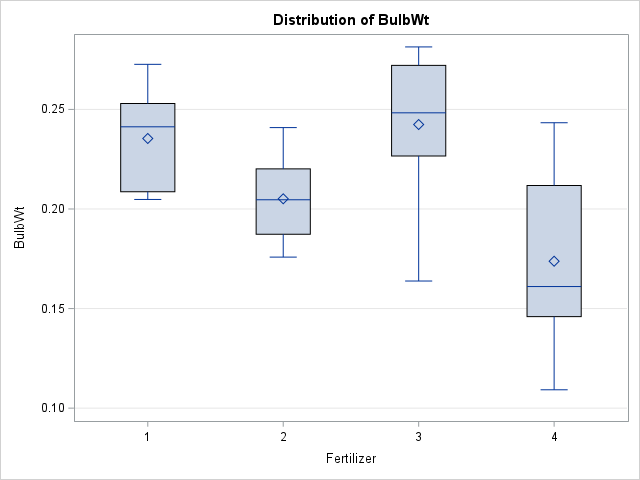

In [16]:
proc glm data=stat1.garlic plots=all;
    class Fertilizer;
    model Bulbwt=Fertilizer;
    means Fertilizer / hovtest=levene;
run;

## Assumptions Check:
- Independance observations
- Normal distributed residuals (distribution and QQ plots)
- Equal population variances (residual plot)

1. The F value of the model has a p-value of .0013. Assuming the assumptions of the model are valid, use the null hypothesis that all group means are equal, we have statistical evidence to reject this null. That at least one of the group means is not equal to the others.
2. The $ R^2$ value is 42. The heating groups explain about 42% of the variation in the data.
3. Lastly, looking atLevene's Test for Homogeneity of BulbWt Variance there is a p-value of .22. The null hypothesis is that aall groups have equal variances. With the high p-value we do not have evidence to reject the null hypothesis of equal variance. 

### <a id="P3">Practice 3 : Describing the Relationship between Continuous Variables</a>
[Back to contents](#toc)


Percentage of body fat, age, weight, height, and 10 body circumference measurements (for example, abdomen) were recorded for 252 men by Dr. Roger W. Johnson of Calvin College in Minnesota . The data are in the STAT1.BodyFat2 data set. B ody fat, one measure of health, was accurately estimated by a water displacement measurement technique.

In [3]:
proc print data=stat1.bodyfat2 (obs=20) noobs;
run;

Case,PctBodyFat1,PctBodyFat2,Density,Age,Weight,Height,Adioposity,FatFreeWt,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,20.9,1.0502,24,210.25,74.75,26.5,167.0,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
7,19.0,19.2,1.0549,26,181.00,69.75,26.2,146.6,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
8,12.8,12.4,1.0704,25,176.00,72.50,23.6,153.6,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
9,5.1,4.1,1.0900,25,191.00,74.00,24.6,181.3,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
10,12.0,11.7,1.0722,23,198.25,73.50,25.8,174.4,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


Generate scatter plots and correlations for the VAR variables Age, Weight, Height, and the circumference measures versus the PctBodyFat2 variable.

In [8]:
* PROC corr has a limit of 10 variables. Need to parts *;

%let vars=Age Weight Height Neck Chest Abdomen Hip Thigh Knee Ankle;

* turn on pop up for HTML *;
ods graphics / reset=all imagemap;

* Group one *;
proc corr data=stat1.bodyfat2
          rank
          nosimple
          plots=scatter(nvar=all ellipse=none);
    var &vars;
    with PctBodyFat2;
    id Case; *sets the pop up using case*;
run;

* Group two *;
%let vars= Biceps Forearm Wrist;
proc corr data=stat1.bodyfat2
          rank
          nosimple
          plots=scatter(nvar=all ellipse=none);
    var &vars;
    with PctBodyFat2;
    id Case; *sets the pop up using case*;
run;

Plot scatters of each predictor against response. Add reg line.


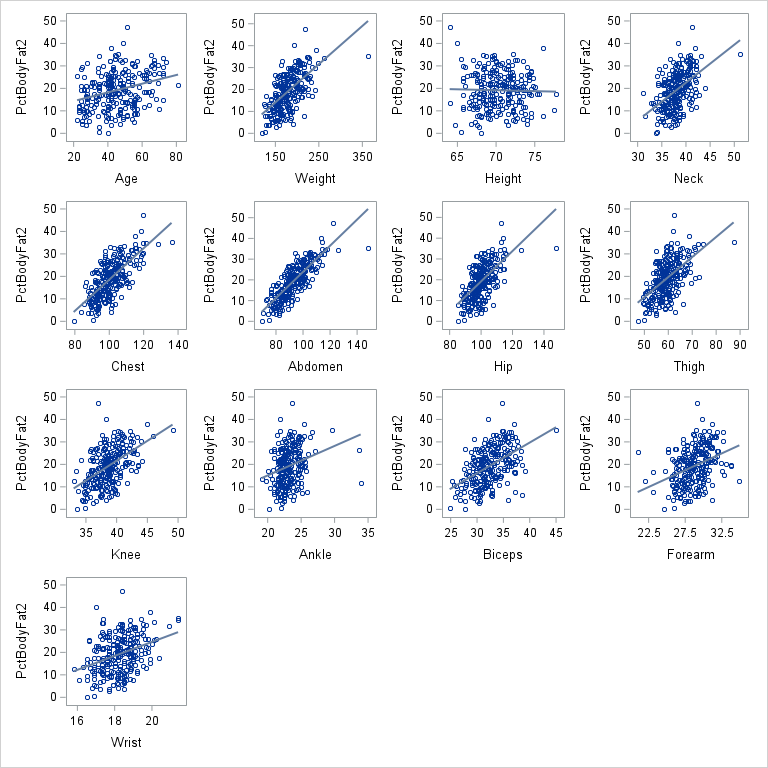

In [48]:
%let vars=Age Weight Height Neck Chest Abdomen Hip Thigh Knee Ankle Biceps Forearm Wrist;

* turn on pop up for HTML *;
ods graphics / height=8in;
proc sgscatter data=stat1.bodyfat2;
    plot pctBodyFat2 * (&vars) / reg;
run;
ods graphics / reset;

Compare top 5 correlated variables to check for collinearity.

In [49]:
* Find the best 5 *;
%let vars=Age Weight Height Neck Chest Abdomen Hip Thigh Knee Ankle Biceps Forearm Wrist;
proc corr data=stat1.bodyfat2
          rank
          nosimple
          best=5
          out=pearsontop5(where=(_TYPE_="CORR"))
          noprint;
    var &vars;
    id Case; *sets the pop up using case*;
run;

proc print data=pearsontop5_raw(obs=5);
run;

Obs,_TYPE_,_NAME_,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1,CORR,Age,1.00000,-0.01275,-0.24521,0.11351,0.17645,0.23041,-0.05033,-0.20010,0.01752,-0.10506,-0.04116,-0.08506,0.21353
2,CORR,Weight,-0.01275,1.00000,0.48689,0.83072,0.89419,0.88799,0.94088,0.86869,0.85317,0.61369,0.80042,0.63030,0.72977
3,CORR,Height,-0.24521,0.48689,1.00000,0.32114,0.22683,0.18977,0.37211,0.33856,0.50050,0.39313,0.31851,0.32203,0.39778
4,CORR,Neck,0.11351,0.83072,0.32114,1.00000,0.78484,0.75408,0.73496,0.69570,0.67240,0.47789,0.73115,0.62366,0.74483
5,CORR,Chest,0.17645,0.89419,0.22683,0.78484,1.00000,0.91583,0.82942,0.72986,0.71950,0.48299,0.72791,0.58017,0.66016


Add colors to *highly correlated* variables to look for collinearity between predictors

In [54]:
%let highCorr=.7;

proc format;
   value corrs 
               &highCorr -< 1 = lightBlue
               -1 <- -&highCorr = lightBlue;
run;


proc print data=pearsontop5 noobs;
    var &vars / style={background=corrs.};
run;

Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1.00000,-0.01275,-0.24521,0.11351,0.17645,0.23041,-0.05033,-0.20010,0.01752,-0.10506,-0.04116,-0.08506,0.21353
-0.01275,1.00000,0.48689,0.83072,0.89419,0.88799,0.94088,0.86869,0.85317,0.61369,0.80042,0.63030,0.72977
-0.24521,0.48689,1.00000,0.32114,0.22683,0.18977,0.37211,0.33856,0.50050,0.39313,0.31851,0.32203,0.39778
0.11351,0.83072,0.32114,1.00000,0.78484,0.75408,0.73496,0.69570,0.67240,0.47789,0.73115,0.62366,0.74483
0.17645,0.89419,0.22683,0.78484,1.00000,0.91583,0.82942,0.72986,0.71950,0.48299,0.72791,0.58017,0.66016
0.23041,0.88799,0.18977,0.75408,0.91583,1.00000,0.87407,0.76662,0.73718,0.45322,0.68498,0.50332,0.61983
-0.05033,0.94088,0.37211,0.73496,0.82942,0.87407,1.00000,0.89641,0.82347,0.55839,0.73927,0.54501,0.63009
-0.20010,0.86869,0.33856,0.69570,0.72986,0.76662,0.89641,1.00000,0.79917,0.53980,0.76148,0.56684,0.55868
0.01752,0.85317,0.50050,0.67240,0.71950,0.73718,0.82347,0.79917,1.00000,0.61161,0.67871,0.55590,0.66451
-0.10506,0.61369,0.39313,0.47789,0.48299,0.45322,0.55839,0.53980,0.61161,1.00000,0.48485,0.41905,0.56619


### Summary
- Weight has a high correlation with nearly every other variable.
- Hip also is correlated with most variables.
- Few others to keep an eye on.